In [25]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import tables
from phd.utils.path_tools import find_by_meta
from tabulate import tabulate
from scipy.stats import describe
from scipy.optimize import curve_fit


In [5]:
path = "/mnt/storage2/phd/data/thunderstorm/Graph/Dwyer2003.dat"

In [17]:
with open(path) as fin:
    text = fin.read()
    text = text.replace(",", ".")
    text = text.split("\n")
    data = [[float(i) for i in line.split()] for line in text[:-1]]

In [18]:
data = np.array(data)
print(data)

In [23]:
data = data[3:]

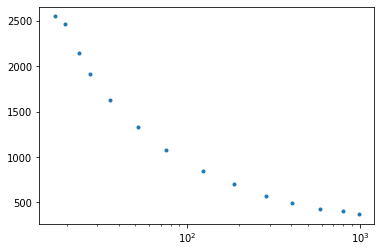

In [27]:
plt.plot(data[:,0], data[:,1], ".")
plt.xscale("log")

In [52]:
def power(x, alpha, const, back):
    return const*np.exp(-x/alpha) + back

In [55]:
popt, _ = curve_fit(power, xdata=data[:,0], ydata=data[:, 1], p0=[100, 2000, 500])


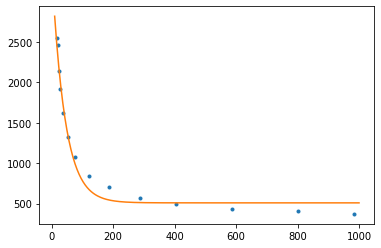

In [56]:
x = np.linspace(10,1000, 300)
plt.plot(data[:,0], data[:,1], ".")
plt.plot(x, power(x, *popt))
# plt.xscale("log")

In [57]:
popt

array([  42.341824  , 2921.42285372,  508.61416103])

In [58]:
x = np.arange(100, 1001, 100)
y  = power(x, *popt)

In [61]:
for i,j in zip(x,y):
    print(i,j)

100 783.9784797005914
200 534.5691534425279
300 511.06059866172933
400 508.84475470684055
500 508.63589608162096
600 508.6162097110025
700 508.6143541343524
800 508.6141792334135
900 508.6141627477898
1000 508.6141611939057
